In [34]:
from keras.models import Sequential
from keras.layers import Dense, Input

## Task 4

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('lab-datasets/Synthetic_Financial_datasets_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.duplicated().value_counts()

False    6362620
Name: count, dtype: int64

In [9]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

What a cleanest dataset i just got!

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


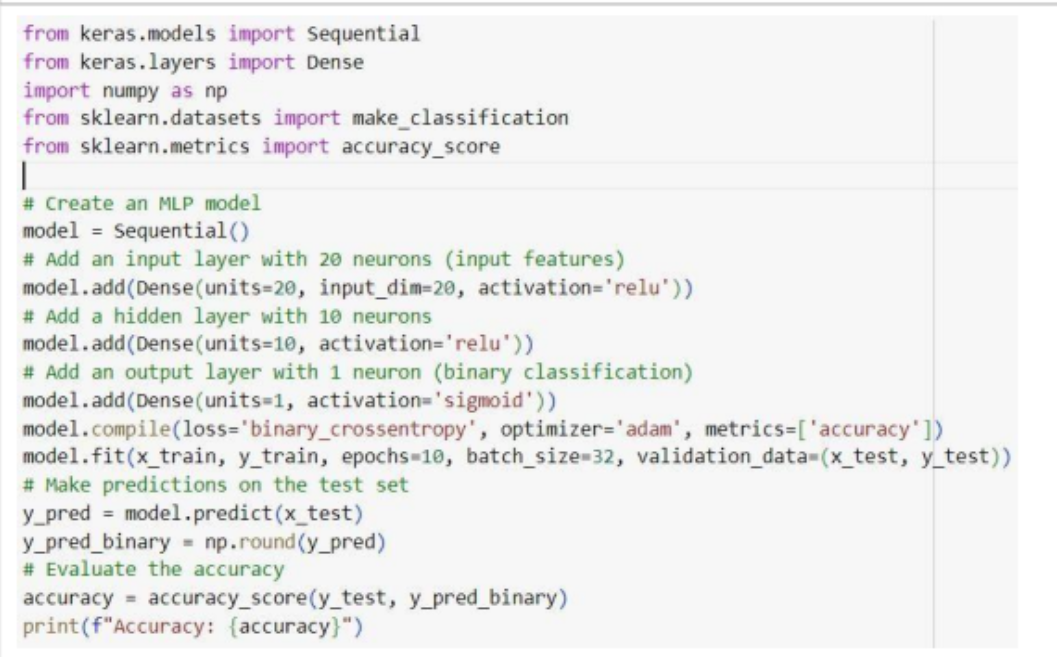

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])
X = pd.get_dummies(X, columns=['type'], drop_first=True) #oe-hot encoding
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   type_CASH_OUT   bool   
 7   type_DEBIT      bool   
 8   type_PAYMENT    bool   
 9   type_TRANSFER   bool   
dtypes: bool(4), float64(5), int64(1)
memory usage: 315.5 MB


In [57]:
from keras.metrics import F1Score
from keras.callbacks import EarlyStopping

model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid') #output layer
    ])

model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', F1Score(average='micro', threshold=0.5), 'recall']
)

es = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', restore_best_weights=True)

res = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/50
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 595s 4ms/step - accuracy: 0.9987 - f1_score: 0.0000e+00 - loss: 0.0100 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9987 - val_f1_score: 0.0000e+00 - val_loss: 0.0099 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 397s 2ms/step - accuracy: 0.9987 - f1_score: 0.0000e+00 - loss: 0.0099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9987 - val_f1_score: 0.0000e+00 - val_loss: 0.0099 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 400s 3ms/step - accuracy: 0.9987 - f1_score: 0.0000e+00 - loss: 0.0099 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.9987 - val_f1_score: 0.0000e+00 - val_loss: 0.0102 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
159066/159066 ━━━━━━━━━━━━━━━━━━━━ 371s 2ms/step - accuracy: 0.9987 - f1_score: 0.0000e+00 - loss: 0.0099 - precision: 0.0000e+00 - recal

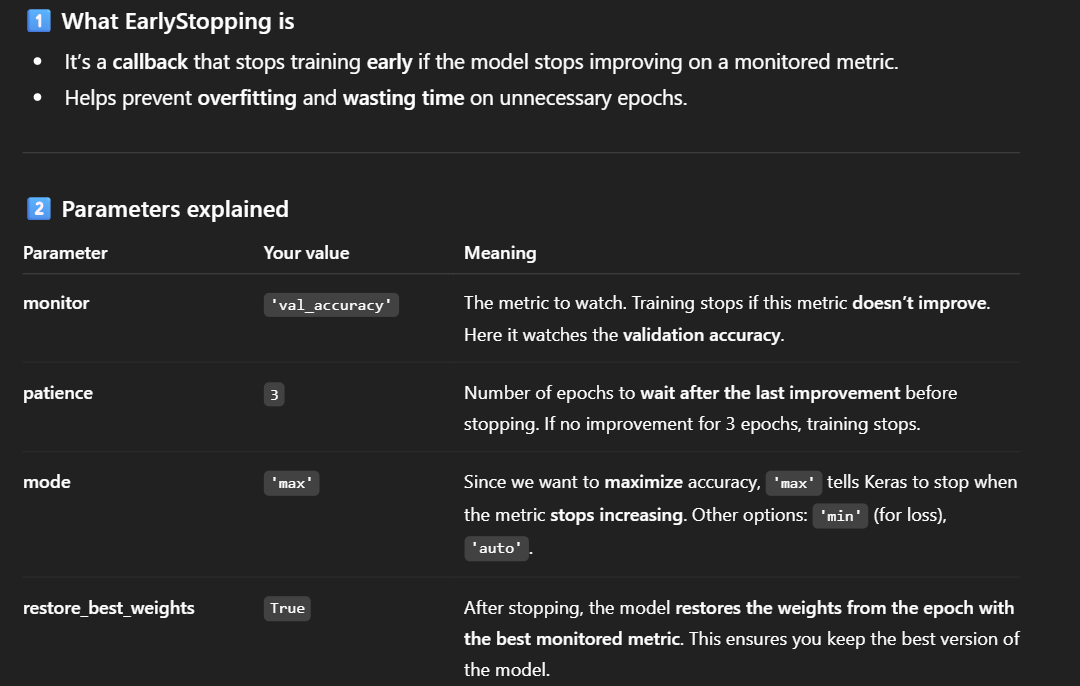

In [59]:
y_predict = model.predict(X_test)

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 38s 941us/step


In [66]:
from sklearn.metrics import accuracy_score
import numpy as np

print(f"Model accuracy: {100 * accuracy_score((np.array(y_predict) >= 0.5).astype(int), y_test):.2f}")

Model accuracy: 99.87


## Task 5: